### Data Science Project: Analyzing COVID-19 Cases in Toronto
Dataset Description: This dataset contains demographic, geographic, and severity information for all confirmed and probable cases reported to and managed by Toronto Public Health since the first case reported in January 2020.
 - Includes cases that are sporadic (occurring in the community) and outbreak-associated.
 - Data are extracted from provincial communicable disease reporting system (iPHIS) and Toronto's custom COVID-19 case management system (CORES). 
 - Link: 
 
2. Key questions to explore and answer from this dataset.
 - What is the age group that is most affected? 
  - Histogram.
 - **Visual map showcasing number of cases in each neighbourhood**
 - Machine learning: classification - what population set has the highest likelihood of contracting the virus? 
  - We know something about age. 
  - Does location matter? Which neighborhood has been most affected?
  - What about income?
 - Source of infection: Which source is contributing the most to Canada's COVID-19 cases?
 - How many confirmed cases? How many probable cases?
 - What are the average episode dates? (time between when disease was acquired to the symptom onset/lab specimen collection date/ reported date.
 - Does sex matter?
 - What are the individual outcomes of each case? % fatal, resolved, and active.
 - How many have been hospitalized? In ICU? Intubated?

3. We hear in the news that long-term care homes have been hit hard. What can we learn about what's going on from this dataset?
 - Useful features: "Outbreak associated"
 
4. How can we apply machine learning methodologies to this dataset?
 - DecisionTree, RandomForest, Ensemble Learning, Grid Search, Random Search. This is more of a classification project.

In [9]:
import pandas as pd
import shapefile
import matplotlib.pyplot as plt

In [10]:
## Dataset import from my github repository.
url = 'https://raw.githubusercontent.com/KevinRiady/Datasets/master/COVID19%20cases.csv'
df = pd.read_csv(url)

In [11]:
## Understanding the dataset
print(df.head(5))
print("---")
print(df.info())

     _id  Assigned_ID Outbreak Associated       Age Group  \
0  30771            1            Sporadic  50 to 59 Years   
1  30772            2            Sporadic  50 to 59 Years   
2  30773            3            Sporadic  20 to 29 Years   
3  30774            4            Sporadic  60 to 69 Years   
4  30775            5            Sporadic  60 to 69 Years   

      Neighbourhood Name  FSA Source of Infection Classification Episode Date  \
0        Willowdale East  M2N              Travel      CONFIRMED   2020-01-22   
1        Willowdale East  M2N              Travel      CONFIRMED   2020-01-21   
2      Parkwoods-Donalda  M3A              Travel      CONFIRMED   2020-02-05   
3  Church-Yonge Corridor  M4W              Travel      CONFIRMED   2020-02-16   
4  Church-Yonge Corridor  M4W              Travel      CONFIRMED   2020-02-20   

  Reported Date Client Gender   Outcome Currently Hospitalized  \
0    2020-01-23        FEMALE  RESOLVED                     No   
1    2020-01-2

In [12]:
## Since we have column names here, we'll dedicate this space to setting up
## the different dataframes we'll be using in this project.
neighbourhood_infections = df[['Neighbourhood Name', 'FSA', 'Classification',
                             'Episode Date', 'Reported Date', 'Outcome']]

### Neighbourhood Infections
To study the rise of COVID-19 cases in various neighbourhoods around the city.

In [13]:
## What age group has been most affected by this pandemic?
## Find out how ages has been grouped in this dataset.
age_group = df['Age Group'].unique()
age_group

array(['50 to 59 Years', '20 to 29 Years', '60 to 69 Years',
       '80 to 89 Years', '70 to 79 Years', '30 to 39 Years',
       '40 to 49 Years', '19 and younger', nan, '90 and older'],
      dtype=object)

In [14]:
## Finding the number of people belonging to each age group.
## By using .value_counts method, we can quickly discover which age group
## has been impacted the most.

countsByAgeGroup = df['Age Group'].value_counts(ascending=False).rename_axis('unique_values').reset_index(name='counts')
countsByAgeGroup
new_index = [8, 1, 2, 3, 0, 4, 7, 5, 6]
countsByAgeGroup = countsByAgeGroup.reindex(new_index)
countsByAgeGroup
## 50 to 59 > 20 to 29 > 30 to 39 > 40 to 49 > 60 - 69 > 80 - 89. 
## 19 and younger is the lowest.

## Begging question: how many % do these numbers make up out of the total 
## population in these age groups? For that, we need to find another dataset.
## Since our dataset focuses on Toronto, we only want the census as it 
## pertains to this city.

,unique_values,counts
8,19 and younger,1004
1,20 to 29 Years,2269
2,30 to 39 Years,2216
3,40 to 49 Years,2171
0,50 to 59 Years,2455
4,60 to 69 Years,1672
7,70 to 79 Years,1072
5,80 to 89 Years,1545
6,90 and older,1109


In [15]:
## Let's import the 2016 Canadian Census
url = 'https://raw.githubusercontent.com/KevinRiady/Datasets/master/98-400-X2016001_English_CSV_data.csv'
census2016 = pd.read_csv(url)
census2016

,CENSUS_YEAR,GEO_CODE (POR),GEO_LEVEL,GEO_NAME,GNR,DATA_QUALITY_FLAG,ALT_GEO_CODE,DIM: Census year (2),Member ID: Census year (2),Notes: Census year (2),DIM: Age (in single years) and average age (127),Member ID: Age (in single years) and average age (127),Notes: Age (in single years) and average age (127),Dim: Sex (3): Member ID: [1]: Total - Sex,Dim: Sex (3): Member ID: [2]: Male,Dim: Sex (3): Member ID: [3]: Female
0,2016,1,0,Canada,4.0,20000,1,2016,1,NaN,Total - Age,1,NaN,35151725.0,17264200.0,17887530.0
1,2016,1,0,Canada,4.0,20000,1,2016,1,NaN,0 to 14 years,2,NaN,5839565.0,2992920.0,2846645.0
2,2016,1,0,Canada,4.0,20000,1,2016,1,NaN,0 to 4 years,3,NaN,1898790.0,973035.0,925760.0
3,2016,1,0,Canada,4.0,20000,1,2016,1,NaN,Under 1 year,4,NaN,369730.0,189085.0,180650.0
4,2016,1,0,Canada,4.0,20000,1,2016,1,NaN,1,5,NaN,372615.0,190900.0,181710.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44191,2016,62,1,Nunavut,7.9,100,62,2011,2,NaN,97,123,NaN,0.0,0.0,0.0
44192,2016,62,1,Nunavut,7.9,100,62,2011,2,NaN,98,124,NaN,0.0,0.0,0.0
44193,2016,62,1,Nunavut,7.9,100,62,2011,2,NaN,99,125,NaN,0.0,0.0,0.0
44194,2016,62,1,Nunavut,7.9,100,62,2011,2,NaN,100 years and over,126,NaN,5.0,5.0,0.0


In [16]:
censusToronto = census2016[(census2016['GEO_NAME'] == 'Toronto') & (census2016['DIM: Census year (2)'] == 2016)]
censusToronto.dtypes

CENSUS_YEAR                                                 int64
GEO_CODE (POR)                                              int64
GEO_LEVEL                                                   int64
GEO_NAME                                                   object
GNR                                                       float64
DATA_QUALITY_FLAG                                           int64
ALT_GEO_CODE                                                int64
DIM: Census year (2)                                        int64
Member ID: Census year (2)                                  int64
Notes: Census year (2)                                    float64
DIM: Age (in single years) and average age (127)           object
Member ID: Age (in single years) and average age (127)      int64
Notes: Age (in single years) and average age (127)        float64
Dim: Sex (3): Member ID: [1]: Total - Sex                 float64
Dim: Sex (3): Member ID: [2]: Male                        float64
Dim: Sex (

In [17]:
TorontoByAge = censusToronto[['DIM: Age (in single years) and average age (127)', 'Dim: Sex (3): Member ID: [1]: Total - Sex']]
TorontoByAge = TorontoByAge[pd.to_numeric(TorontoByAge['DIM: Age (in single years) and average age (127)'], errors='coerce').notnull()]
TorontoByAge['DIM: Age (in single years) and average age (127)'] = TorontoByAge['DIM: Age (in single years) and average age (127)'].astype(str).astype(int)
TorontoByAge.dtypes
## Now we need to somehow manipulate this such that it fits to the COVID-19 dataset age grouping.

DIM: Age (in single years) and average age (127)      int32
Dim: Sex (3): Member ID: [1]: Total - Sex           float64
dtype: object

In [18]:
## Aim: to group our census based on this 
## '50 to 59 Years', '20 to 29 Years', '60 to 69 Years',
## '80 to 89 Years', '70 to 79 Years', '30 to 39 Years',
## '40 to 49 Years', '19 and younger', nan, '90 and older'
# OneToNineteen = TorontoByAge[(TorontoByAge['DIM: Age (in single years) and average age (127)'] > '1') & (TorontoByAge['DIM: Age (in single years) and average age (127)'] < '19') ].sum()['Dim: Sex (3): Member ID: [1]: Total - Sex']
start = [1, 20, 30, 40, 50, 60, 70, 80, 90]
end = [19, 29, 39, 49, 59, 69, 79, 89, 150]
TorontoByAgeList = []

for (s, e) in zip(start, end):
    TorontoByAgeList.append(TorontoByAge[(TorontoByAge['DIM: Age (in single years) and average age (127)'] > s ) & (TorontoByAge['DIM: Age (in single years) and average age (127)'] < e) ].sum()['Dim: Sex (3): Member ID: [1]: Total - Sex'])

TorontoByAgeList ## this is also the current demographic in Toronto.

[1154235.0,
 671380.0,
 661485.0,
 686275.0,
 701335.0,
 486875.0,
 278015.0,
 148510.0,
 31805.0]

In [19]:
## sanity check: 
print(TorontoByAge)
print("---")
print(TorontoByAge[(TorontoByAge['DIM: Age (in single years) and average age (127)'] == 1 )])
print(TorontoByAge[(TorontoByAge['DIM: Age (in single years) and average age (127)'] == 99 )])

       DIM: Age (in single years) and average age (127)  \
19308                                                 1   
19309                                                 2   
19310                                                 3   
19311                                                 4   
19313                                                 5   
...                                                 ...   
19424                                                95   
19425                                                96   
19426                                                97   
19427                                                98   
19428                                                99   

       Dim: Sex (3): Member ID: [1]: Total - Sex  
19308                                    60165.0  
19309                                    61580.0  
19310                                    63995.0  
19311                                    64585.0  
19313                               

In [20]:
## So let's go back to the % population affected by COVID-19 in Toronto by age group.
## And let's show it in a pie chart.
## First, convert the data frame of unique value counts of COVID-19 cases by age, countsByAgeGroup,
## into lists.
## Let's go back up to reindex the dataframe since it's easier than to reindex a list.
countsByAgeGroupList = countsByAgeGroup.values.tolist()
countsByAgeGroupList
percentAffected = []
print("% affected in Toronto grouped by Age")

# for x in range(8):
#     print(countsByAgeGroupList[x][0], ":", (1 - ((TorontoByAgeList[x] - countsByAgeGroupList[x][1])
#                 /TorontoByAgeList[x]))*100, "%")

for x in range(8):
    percentAffected.append((1 - ((TorontoByAgeList[x] - countsByAgeGroupList[x][1])
                /TorontoByAgeList[x]))*100)
    print(countsByAgeGroupList[x][0], ":", percentAffected[x], "%")


% affected in Toronto grouped by Age
19 and younger : 0.0869840197186833 %
20 to 29 Years : 0.33796061842771286 %
30 to 39 Years : 0.335003817168944 %
40 to 49 Years : 0.31634548832465414 %
50 to 59 Years : 0.3500466966570914 %
60 to 69 Years : 0.343414634146344 %
70 to 79 Years : 0.3855907055374752 %
80 to 89 Years : 1.04033398424348 %


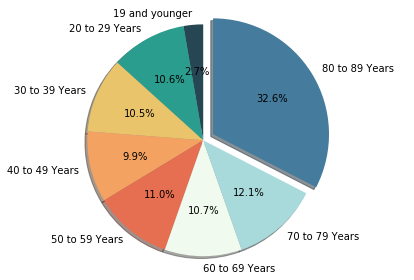

In [21]:
## Let's put this into a pie chart. 
labels = []

for x in range(8):
    labels.append(countsByAgeGroupList[x][0])
    
labels
explode = (0, 0, 0, 0, 0, 0, 0, 0.1)
colors = ['#264653', 
          '#2A9D8F', 
          '#E9C46A', 
          '#F4A261', 
          '#E76F51', 
          '#f1faee', 
          '#a8dadc', 
          '#457b9d']

fig1, ax1 = plt.subplots()
ax1.pie(percentAffected, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)

ax1.axis('equal')
plt.tight_layout()
plt.show()

In [23]:
## Map of COVID19 progression in various neighbourhoods within the city.
## Let's get the shape files to determine metropolitan area boundaries
sf = shapefile.Reader(r"C:\Users\Kevin Riady\Downloads\lcma000b16a_e\lcma000b16a_e.shp")

In [24]:
plt.figure()
for shape in sf.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    plt.plot(x,y)
plt.show()

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe8 in position 10: invalid continuation byte

<Figure size 432x288 with 0 Axes>

In [1]:
from osgeo import gdal

ModuleNotFoundError: No module named 'osgeo'